# Investigation of missing grunnkrets-data

In [3]:
# Magic to automatically update imports if functions in utils are changed
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from utils import group_df, preprocess_grunnkrets_df

In [4]:
age_distribution = pd.read_csv("data/grunnkrets_age_distribution.csv")
new_age_distribution = preprocess_grunnkrets_df(age_distribution)
new_age_distribution.shape

(11379, 96)

In [5]:
house_distribution = pd.read_csv("data/grunnkrets_households_num_persons.csv")
new_house_distribution = preprocess_grunnkrets_df(house_distribution)
new_house_distribution.shape

(13035, 13)

In [6]:
income_distribution = pd.read_csv("data/grunnkrets_income_households.csv")
new_income_distribution = preprocess_grunnkrets_df(income_distribution)
new_income_distribution.shape

(13269, 11)

In [23]:
base_distribution = pd.read_csv("data/grunnkrets_norway_stripped.csv")
new_base_distribution = preprocess_grunnkrets_df(base_distribution)
new_base_distribution.shape

(13270, 10)

In [8]:
from sklearn.model_selection import train_test_split
from utils import preprocess_grunnkrets_df

stores_train = pd.read_csv("data/stores_train.csv")
stores_train, _ = train_test_split(stores_train, test_size=0.2, random_state=0)
stores_train = preprocess_grunnkrets_df(stores_train)
stores_train

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,fylke,kommune,delomrade
11010,998744180-998753015-318500,2016,GURIMALLA VELLVÆRE AS,3.2.4.0,Spas,10010705,PARADISVEIEN 11 C,58.152608,7.962860,NaN,NaN,0.434,10,1001,100107
9678,982227550-871669422-181468,2016,BRIT TONES FRISØRSALONG,3.2.1.0,Hairdressers,11030914,STOKKAVEIEN 55,58.969730,5.715835,NaN,NaN,4.862,11,1103,110309
7371,912422496-812475622-642262,2016,FELLE DAGLIGVARE,2.8.1.0,Grocery stores,8300108,NaN,58.903780,8.744639,SNARKJØP GRUPPEN,NaN,3.972,8,830,83001
2069,889014652-999354076-498416,2016,BAUGE OG BAHUS AS,1.1.7.0,Hotels with restaurants,14120106,NaN,61.073269,4.841515,NaN,NaN,0.500,14,1412,141201
2370,998897467-998932742-456935,2016,BISLETT KEBAB HOUSE PRINSDAL,1.1.9.0,Fast food,3013206,NEDRE PRINSDALS VEI 77,59.833618,10.807447,BISLETT KEBAB HOUSE,NaN,10.737,3,301,30132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,914174732-914242320-717446,2016,DINNER TANDOORI AS,1.1.6.4,Belongs to dining,3012408,TØYENGATA 35,59.914491,10.769136,NaN,NaN,0.898,3,301,30124
4869,915866999-915896146-785222,2016,PÅ LUNDSEN,2.4.6.0,Clothing stores,10040204,KIRKEGATEN 16,58.296613,6.661995,NaN,NaN,3.920,10,1004,100402
12146,914543363-971687606-23674,2016,GULLSMED H A NEERBYE,3.3.6.0,Jewelers,3010504,HENRIK IBSENS GATE 60,59.915080,10.721928,MESTERGULL,NaN,10.155,3,301,30105
9408,992425490-992484896-7935,2016,FLORISS TVEDESTRAND,2.9.8.0,Flower shops,9140204,INDUSTRIVEIEN 8,58.628738,8.915808,FLORISS DRIFT,Grisen Storsenter,2.740,9,914,91402


In [9]:
stores_train.shape

(3401, 15)

In [10]:
stores_train['grunnkrets_id'].unique().shape
nums = set()
for i in stores_train['grunnkrets_id']:
    if not i in list(new_age_distribution['grunnkrets_id']):
        nums.add(i)
print(nums)
len(nums)

{6020609, 16017409, 18040311, 16017414, 16017415, 8260104, 16017418, 6020107, 20300301, 10180116, 3015701, 5170202, 4150306, 12440102, 12440103, 18050601, 4030511, 5400113, 2191412, 3010101, 3010614, 18370103, 10011702, 3010103, 14210107, 3014204, 3014209, 12430402, 5420101, 3013701, 2130506, 18040907, 16240204, 2130509, 8061006, 18040401, 7041107, 11490901, 3013719, 8150105, 6020703, 6020714, 19020401, 16200305, 8050801, 7040113, 10180213, 16017525, 7090807, 1062008, 18410107, 3015804, 12330109, 20190201, 2192009, 3011210, 10260108, 12010636, 8340112, 20030101, 18110102, 16011417, 3014307, 3010211, 14120103, 3013801, 9140401, 9140402, 11031734, 11031736, 18450105, 11031737, 17490105, 17490106, 1063101, 8060601, 1063107, 8060101, 16380101, 20220109, 18150101, 19430101, 8260316, 12240619, 12010225, 4030707, 5020404, 17210101, 1061110, 4120308, 16011514, 16011516, 14010109, 3010305, 3010306, 2170115, 3010310, 6120203, 15460108, 16015117, 1064206, 8061202, 16014105, 7041305, 17140507, 171

197

3401
11379
197

3401
13035
50

3401
13269
24

3401
13270
23

1255
1541
3

1255
1543
1

1255
1542
2

1255
1543
1

410
428
0

410
428
0

410
428
0

410
428
0

19
19
0

19
19
0

19
19
0

19
19
0



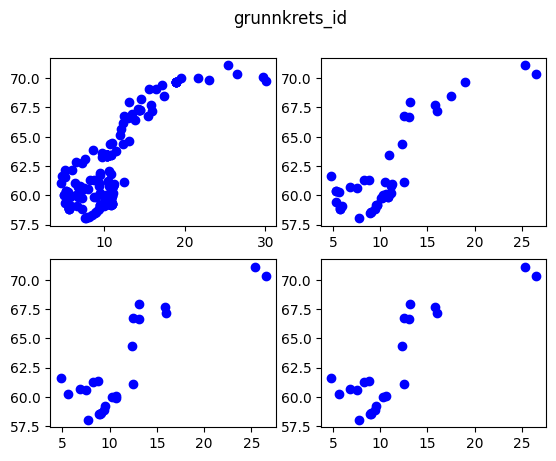

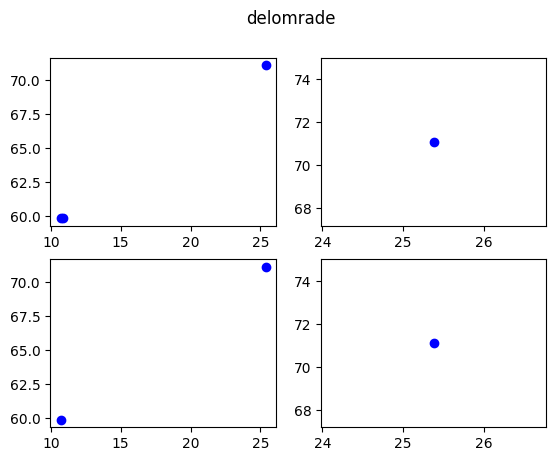

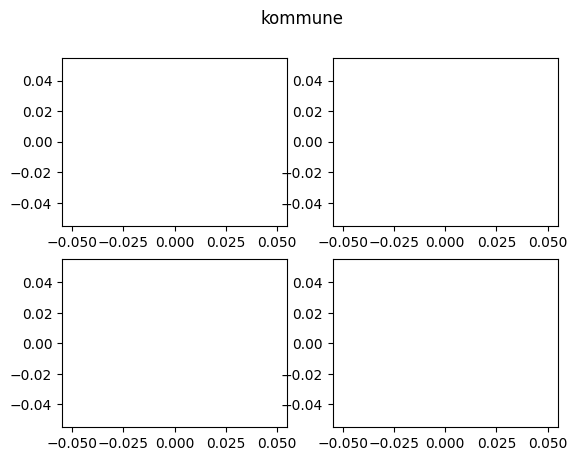

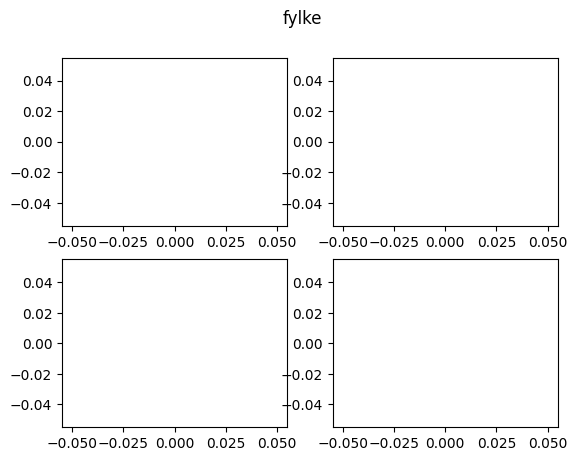

In [13]:
import matplotlib.pyplot as plt
pos = ([0,0],[0,1], [1,0], [1,1])
for level in ['grunnkrets_id', 'delomrade', 'kommune', 'fylke']:
    fig, axs = plt.subplots(2,2)
    fig.suptitle(level)
    axs = axs.flatten()
    for i, df in enumerate( [new_age_distribution, new_house_distribution, new_income_distribution, new_base_distribution] ):
        base = set(stores_train[level].values)
        age = set(df[level].values)
        nums = base - age
        print(len(base))
        print(len(age))
        print(len(nums))
        print()
        # print(list(nums))
        missing_df = stores_train[stores_train[level].isin(list(nums))]
        axs[i].plot(missing_df["lon"], missing_df["lat"], "bo")
        # axs[i].ylabel("lon")
        # axs[i].xlabel("lat")
    # plt.show();

We are missing a large number of grunnkrets datapoints, but there only seems to be a few missing for delomrade. Kommune and fylke are complete. As delomrade showed promise in the grunnkrets investigation, we can try to insert the few missing values for grunnkrets

In [20]:
grunnkrets_df = pd.read_csv("delomrade_data/2016-2017.csv", delimiter=';', encoding='latin1')
grunnkrets_df


,code,parentCode,level,name,shortName,notes,validFrom,validTo
0,1010100,NaN,1,Halden vest,NaN,NaN,NaN,NaN
1,1010102,1010100.0,2,Båstadlund,NaN,NaN,NaN,NaN
2,1010103,1010100.0,2,Låby,NaN,NaN,NaN,NaN
3,1010104,1010100.0,2,Stangeløkka,NaN,NaN,NaN,NaN
4,1010105,1010100.0,2,Refne/Banken,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
15552,20300503,20300500.0,2,Svanvik,NaN,NaN,NaN,NaN
15553,20300504,20300500.0,2,Melkefoss/Skrotnes,NaN,NaN,NaN,NaN
15554,20300505,20300500.0,2,Øvre Pasvik,NaN,NaN,NaN,NaN
15555,99999900,NaN,1,Uoppgitt,NaN,NaN,NaN,NaN


In [38]:
delomrade_df = grunnkrets_df[grunnkrets_df['parentCode'].isna()][['code', 'name']]
delomrade_df

,code,name
0,1010100,Halden vest
9,1010200,Halden øst
19,1010300,Halden syd
25,1010400,Tistedalsområdet
33,1010500,Berg/Sponviken
...,...,...
15522,20300200,Høybuktmoen/Bjørnevatn
15531,20300300,Kirkenes
15543,20300400,Østre Sør-Varanger
15549,20300500,Pasvik


In [39]:
delmomrades = np.sort(new_base_distribution.delomrade.unique())
delmomrades

array([ 10101,  10102,  10103, ..., 203003, 203004, 203005])

In [45]:
delomrade_df['new_code'] = delomrade_df['code'].apply(str).str.slice(0,-2).apply(int)
delomrade_df.sort_values(by='new_code')

,code,name,new_code
0,1010100,Halden vest,10101
9,1010200,Halden øst,10102
19,1010300,Halden syd,10103
25,1010400,Tistedalsområdet,10104
33,1010500,Berg/Sponviken,10105
...,...,...,...
15522,20300200,Høybuktmoen/Bjørnevatn,203002
15531,20300300,Kirkenes,203003
15543,20300400,Østre Sør-Varanger,203004
15549,20300500,Pasvik,203005


In [46]:
set(delomrade_df.new_code.values) - set(delmomrades)

{201902, 999999}

In [49]:
delmomrades_base = np.sort(new_base_distribution.delomrade.unique())
delmomrades_income = np.sort(new_income_distribution.delomrade.unique())
delmomrades_house = np.sort(new_house_distribution.delomrade.unique())
delmomrades_age = np.sort(new_age_distribution.delomrade.unique())

In [50]:
print(set(delomrade_df.new_code.values) - set(delmomrades_base))
print(set(delomrade_df.new_code.values) - set(delmomrades_income))
print(set(delomrade_df.new_code.values) - set(delmomrades_house))
print(set(delomrade_df.new_code.values) - set(delmomrades_age))

{201902, 999999}
{30157, 201902, 999999}
{201902, 999999}
{30158, 30157, 201902, 999999}
